In [23]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy
from sklearn import linear_model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import pacf
%matplotlib inline

In [2]:
df = pd.read_csv('D:/DSF Files/CPIAUCSL.csv')

In [3]:
display(df.info())
display(df.shape)
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      890 non-null    object 
 1   CPIAUCSL  890 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.0+ KB


None

(890, 2)

,DATE,CPIAUCSL
0,1947-01-01,21.48
1,1947-02-01,21.62
2,1947-03-01,22.00
3,1947-04-01,22.00
4,1947-05-01,21.95


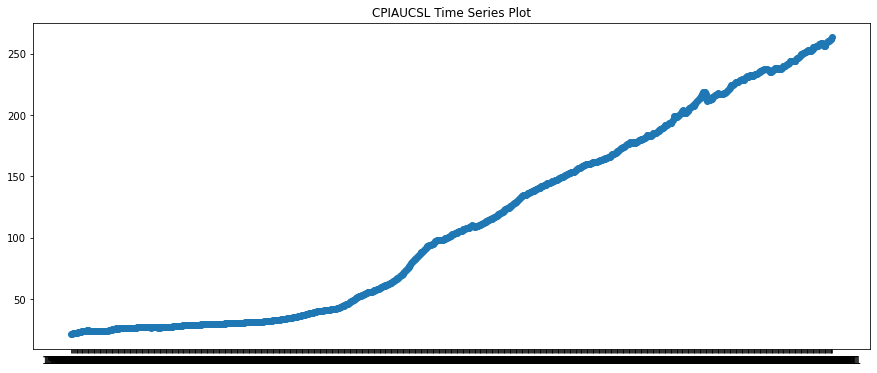

In [4]:
plt.figure(figsize=(15,6))
plt.plot(df.DATE, df.CPIAUCSL, 'o')
plt.title('CPIAUCSL Time Series Plot')
plt.show();

In [5]:
df['diff'] = df['CPIAUCSL'] - df['CPIAUCSL'].shift()
df['diff'] = df['diff'].fillna(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      890 non-null    object 
 1   CPIAUCSL  890 non-null    float64
 2   diff      890 non-null    float64
dtypes: float64(2), object(1)
memory usage: 21.0+ KB


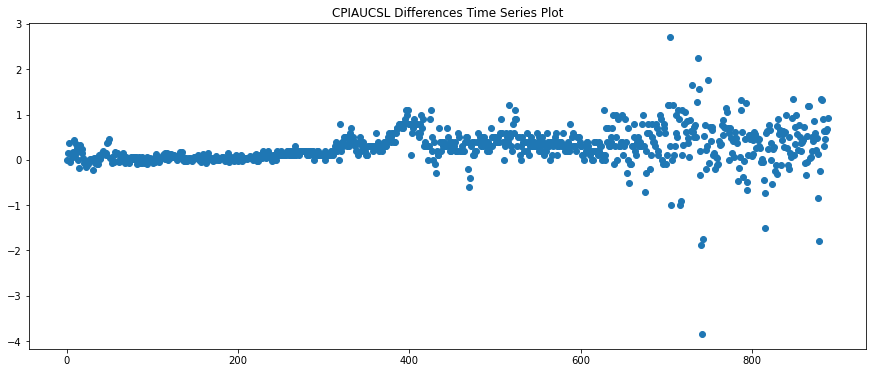

In [7]:
plt.figure(figsize=(15,6))
plt.plot(df['diff'], 'o')
plt.title('CPIAUCSL Differences Time Series Plot')
plt.show();

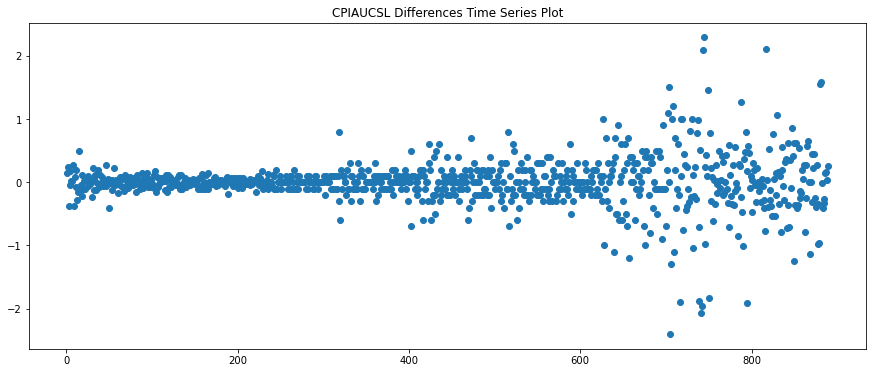

In [18]:
df['diff2'] = df['diff'] - df['diff'].shift()
plt.figure(figsize=(15,6))
plt.plot(df['diff2'], 'o')
plt.title('CPIAUCSL Differences Time Series Plot')
plt.show();

In [8]:
lm = linear_model.LinearRegression()
df['DATE'] = pd.to_datetime(df['DATE'])
X = pd.DataFrame(pd.to_numeric(df['DATE']))
Y = df['CPIAUCSL']

In [9]:
lm.fit(X, Y)
lm.score(X, Y)

0.9511916855684583

In [10]:
lm.coef_[0] * 1000000000 * 24 * 60 * 60 * 30

0.2966038949807954

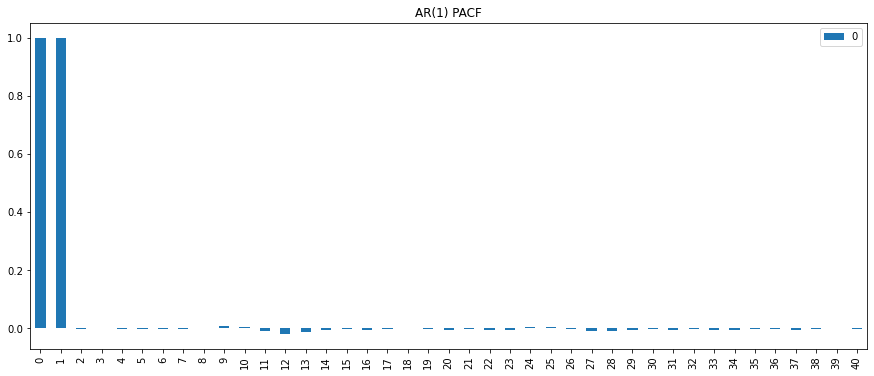

In [11]:
x_acf = pd.DataFrame(pacf(df['CPIAUCSL']))
x_acf.plot(kind='bar', figsize=(15,6))
plt.title("PACF")
plt.show();

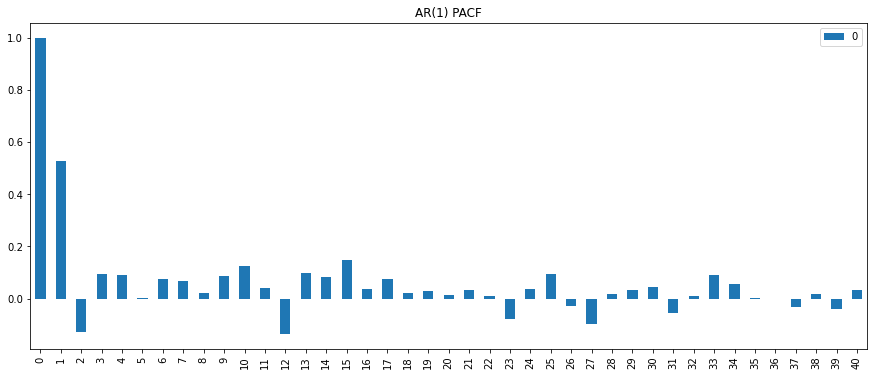

In [12]:
x_acf = pd.DataFrame(pacf(df['diff']))
x_acf.plot(kind='bar', figsize=(15,6))
plt.title("PACF")
plt.show();

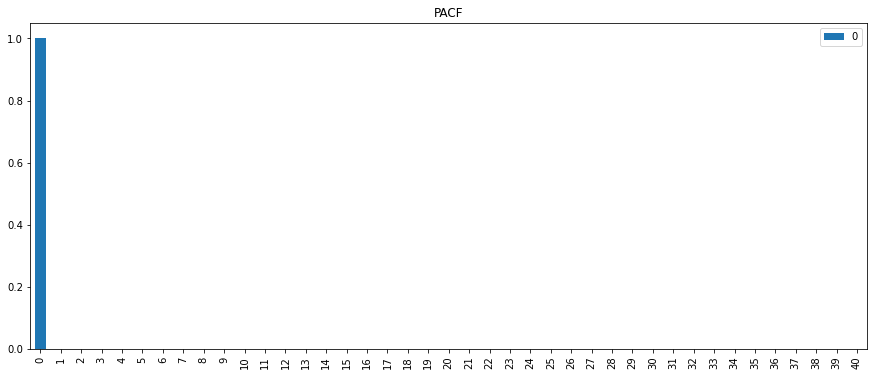

In [19]:
x_acf = pd.DataFrame(pacf(df['diff2']))
x_acf.plot(kind='bar', figsize=(15,6))
plt.title("PACF")
plt.show();

In [20]:
model = ARIMA(df.CPIAUCSL, order=(0,0,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:               CPIAUCSL   No. Observations:                  890
Model:                     ARMA(0, 0)   Log Likelihood               -5154.744
Method:                           css   S.D. of innovations             79.274
Date:                Wed, 31 Mar 2021   AIC                          10313.488
Time:                        15:43:57   BIC                          10323.070
Sample:                             0   HQIC                         10317.150
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        112.4541      2.657     42.319      0.000     107.246     117.662
Residuals Description
count    890.000000
mean      -0.000002
std       79.318445
min      -90.974084
25%      -80.866584
50%      

In [16]:
for i in range(0,5):
    for j in range(1,3):
        print('\n\n')
        for n in range(0,5):
            model = ARIMA(df.CPIAUCSL, order=(i,j,n))
            model_fit = model.fit()
            print(model_fit.summary())
            print('Residuals Description')
            print(model_fit.resid.describe())




                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  889
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -444.478
Method:                           css   S.D. of innovations              0.399
Date:                Wed, 31 Mar 2021   AIC                            892.956
Time:                        15:13:28   BIC                            902.536
Sample:                             1   HQIC                           896.618
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2719      0.013     20.319      0.000       0.246       0.298
Residuals Description
count    8.890000e+02
mean     6.559389e-09
std      3.991569e-01
min     -4.113857e+00
25%     -2.118571e

Residuals Description
count    8.880000e+02
mean     1.875377e-19
std      3.877263e-01
min     -2.400890e+00
25%     -1.008896e-01
50%     -8.896396e-04
75%      9.911036e-02
max      2.289110e+00
dtype: float64
                             ARIMA Model Results                              
Dep. Variable:            D2.CPIAUCSL   No. Observations:                  888
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -376.538
Method:                       css-mle   S.D. of innovations              0.369
Date:                Wed, 31 Mar 2021   AIC                            759.076
Time:                        15:13:29   BIC                            773.443
Sample:                             2   HQIC                           764.568
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  889
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -274.712
Method:                       css-mle   S.D. of innovations              0.329
Date:                Wed, 31 Mar 2021   AIC                            559.424
Time:                        15:13:30   BIC                            583.375
Sample:                             1   HQIC                           568.579
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2664      0.087      3.075      0.002       0.097       0.436
ar.L1.D.CPIAUCSL     0.9938      0.005    181.388      0.000       0.983       1.005
ma.L1.D.CPIAUCSL    -0.4926 

                             ARIMA Model Results                              
Dep. Variable:            D2.CPIAUCSL   No. Observations:                  888
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -285.338
Method:                       css-mle   S.D. of innovations              0.333
Date:                Wed, 31 Mar 2021   AIC                            578.676
Time:                        15:13:32   BIC                            597.832
Sample:                             2   HQIC                           585.998
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.000      1.126      0.260      -0.000       0.001
ar.L1.D2.CPIAUCSL     0.4552      0.031     14.529      0.000       0.394       0.517
ma.L1.D2.CPIAUCSL    -0.

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  889
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -290.493
Method:                       css-mle   S.D. of innovations              0.335
Date:                Wed, 31 Mar 2021   AIC                            590.987
Time:                        15:13:34   BIC                            614.937
Sample:                             1   HQIC                           600.141
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2723      0.022     12.607      0.000       0.230       0.315
ar.L1.D.CPIAUCSL     0.3402      0.146      2.336      0.020       0.055       0.626
ar.L2.D.CPIAUCSL     0.0014 

                             ARIMA Model Results                              
Dep. Variable:            D2.CPIAUCSL   No. Observations:                  888
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -269.139
Method:                       css-mle   S.D. of innovations              0.327
Date:                Wed, 31 Mar 2021   AIC                            548.279
Time:                        15:13:36   BIC                            572.223
Sample:                             2   HQIC                           557.432
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.000      0.839      0.401      -0.001       0.001
ar.L1.D2.CPIAUCSL     0.5291      0.034     15.606      0.000       0.463       0.596
ar.L2.D2.CPIAUCSL    -0.

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  889
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -268.071
Method:                       css-mle   S.D. of innovations              0.327
Date:                Wed, 31 Mar 2021   AIC                            548.142
Time:                        15:13:39   BIC                            576.882
Sample:                             1   HQIC                           559.127
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2654      0.088      3.018      0.003       0.093       0.438
ar.L1.D.CPIAUCSL     1.5187      0.035     42.905      0.000       1.449       1.588
ar.L2.D.CPIAUCSL    -0.7194 

                             ARIMA Model Results                              
Dep. Variable:            D2.CPIAUCSL   No. Observations:                  888
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -268.951
Method:                       css-mle   S.D. of innovations              0.327
Date:                Wed, 31 Mar 2021   AIC                            549.902
Time:                        15:13:41   BIC                            578.636
Sample:                             2   HQIC                           560.886
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.000      0.874      0.382      -0.000       0.001
ar.L1.D2.CPIAUCSL     0.5347      0.035     15.279      0.000       0.466       0.603
ar.L2.D2.CPIAUCSL    -0.

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


                             ARIMA Model Results                              
Dep. Variable:            D2.CPIAUCSL   No. Observations:                  888
Model:                 ARIMA(3, 2, 4)   Log Likelihood                -262.980
Method:                       css-mle   S.D. of innovations              0.325
Date:                Wed, 31 Mar 2021   AIC                            543.960
Time:                        15:13:48   BIC                            587.061
Sample:                             2   HQIC                           560.436
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.000      0.982      0.326      -0.000       0.001
ar.L1.D2.CPIAUCSL    -0.1890      0.066     -2.854      0.004      -0.319      -0.059
ar.L2.D2.CPIAUCSL    -0.

                             ARIMA Model Results                              
Dep. Variable:             D.CPIAUCSL   No. Observations:                  889
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -265.438
Method:                       css-mle   S.D. of innovations              0.326
Date:                Wed, 31 Mar 2021   AIC                            548.876
Time:                        15:13:50   BIC                            591.987
Sample:                             1   HQIC                           565.354
                                                                              
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2608      0.095      2.743      0.006       0.074       0.447
ar.L1.D.CPIAUCSL     0.9234      0.130      7.128      0.000       0.670       1.177
ar.L2.D.CPIAUCSL    -0.3992 

                             ARIMA Model Results                              
Dep. Variable:            D2.CPIAUCSL   No. Observations:                  888
Model:                 ARIMA(4, 2, 2)   Log Likelihood                -267.801
Method:                       css-mle   S.D. of innovations              0.327
Date:                Wed, 31 Mar 2021   AIC                            551.603
Time:                        15:13:55   BIC                            589.914
Sample:                             2   HQIC                           566.247
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.000      0.923      0.356      -0.000       0.001
ar.L1.D2.CPIAUCSL     0.0267      0.253      0.106      0.916      -0.469       0.522
ar.L2.D2.CPIAUCSL     0.

ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

In [27]:
print(math.exp((526-892)/2))

3.3427955219162848e-80


Using only the AIC and BIC, I would choose 4, 2, 3 as the arguments. Ignoring the ARMA values as a differencing was required to make the data stationary, there is a possibility of losing 3.34e-80 data between the two points, which seems insignificant.